# Embedding dimension

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from multiprocessing import Pool
import time
from tqdm import tqdm

from graph_generation import create_ER, dataset_2class_ER, dataset_nclass_ER
from models import GCN, GCNEmbed, GCN1n
from train import Trainer
from embedding import Embedding
from experiments import experiment_embedding_1D_ER

import torch
from torch_geometric.loader import DataLoader
device = torch.device('cuda')

from scipy import stats

import yaml

In [4]:
config = yaml.safe_load(open("configs.yml"))

In [5]:
dataset_grafi_nx, dataset_labels, p1, p2 = dataset_2class_ER(config)

Mean connectivity for each node: 29.788 p=0.3
Mean connectivity for each node: 7.911 p=0.08


In [6]:
embeddings = experiment_embedding_1D_ER(config, dataset_grafi_nx, dataset_labels, [p1, p2])

Loading Dataset...


100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 118.10it/s]


Tempo impiegato: 1.709275722503662
runs/lr-0.005_epochs1500_bs150_layers3_neurons64_lln1/09May_16-22-32


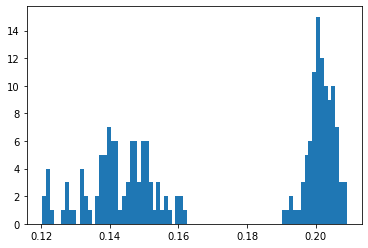

In [7]:
plt.hist(embeddings.embeddings_array, bins=80);

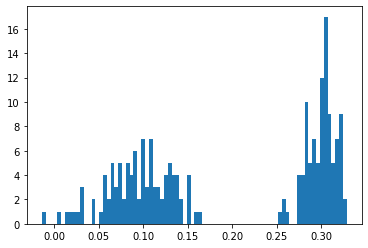

 # Caso con n classi
 

In [11]:
config = yaml.safe_load(open("configs.yml"))

In [13]:
dataset_grafi_nx, dataset_labels, list_p = dataset_nclass_ER(config)

Mean connectivity for each node: 4.928
Mean connectivity for each node: 19.713
Mean connectivity for each node: 29.575
Mean connectivity for each node: 39.58
Mean connectivity for each node: 49.485
Mean connectivity for each node: 59.464


In [15]:
embeddings = experiment_embedding_1D_ER(config, dataset_grafi_nx, dataset_labels, list_p)

Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 75.09it/s]


Tempo impiegato: 8.035593032836914
runs/lr-0.005_epochs1500_bs150_layers3_neurons64_lln1/05May_12-31-08
Non serve calcolare le distanze nel caso di embedding scalare


(array([ 1.,  0.,  1.,  2.,  2.,  5.,  5.,  5., 11., 12.,  7.,  6., 11.,
        10.,  4.,  3.,  3.,  3.,  3.,  4.,  1.,  0.,  4.,  1.,  7.,  5.,
        11., 10., 11.,  7., 13.,  9., 10., 11.,  6., 10., 10.,  7., 11.,
         9.,  6.,  9.,  8.,  1., 10., 10.,  9.,  6.,  7., 14., 12.,  8.,
         7.,  5.,  6., 13., 11.,  6.,  8.,  8.,  5., 10., 15.,  5.,  9.,
        15.,  6., 11.,  9., 12., 15., 15.,  9., 14., 10.,  6.,  4.,  5.,
         7.,  3.]),
 array([-0.03062985, -0.02235625, -0.01408266, -0.00580907,  0.00246453,
         0.01073812,  0.01901172,  0.02728531,  0.0355589 ,  0.0438325 ,
         0.05210609,  0.06037968,  0.06865328,  0.07692687,  0.08520047,
         0.09347406,  0.10174765,  0.11002125,  0.11829484,  0.12656844,
         0.13484202,  0.14311562,  0.15138921,  0.15966281,  0.1679364 ,
         0.17621   ,  0.18448359,  0.19275719,  0.20103078,  0.20930438,
         0.21757796,  0.22585157,  0.23412515,  0.24239875,  0.25067234,
         0.25894594,  0.2672195

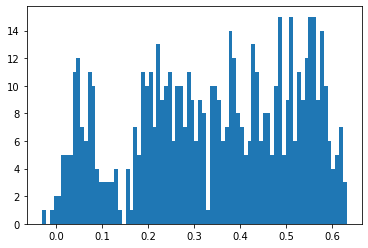

In [88]:
plt.hist(embeddings.embeddings_array, bins=80)

In [1]:
plt.figure(figsize=(18, 6)) #, dpi=60)
for p in list_p:
    mask_int = np.argwhere(embeddings.embedding_labels==p).flatten()
    emb = embeddings.embeddings_array[mask_int].flatten()
    kde = stats.gaussian_kde(emb)
    n,b,_ = plt.hist(emb, bins=50)
    plt.plot(b, kde(b))
    
plt.xlabel('p', fontsize=18)
plt.xticks(fontsize=18) 
plt.show()

NameError: name 'plt' is not defined

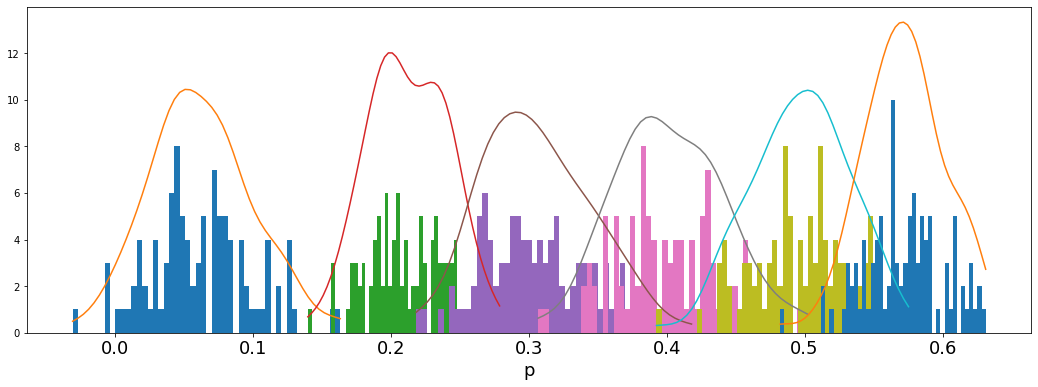